In [35]:
import keras
import numpy as np
import matplotlib.pyplot as plt
# 按顺序构成的模型
from keras.models import Sequential
# Dense全连接层
from keras.layers import Dense,Activation
from keras.optimizers import SGD

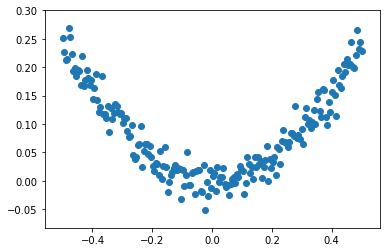

In [36]:
# 使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

# 显示随机点
plt.scatter(x_data,y_data)
plt.show()

cost: 0.018189948
cost: 0.0049088723
cost: 0.002623294
cost: 0.00072276825
cost: 0.0006620069
cost: 0.0003978622
cost: 0.00038961702
W: [[ 0.19143924 -0.4822904  -1.3739882   0.0943093   0.8051908  -0.12230843
   0.70955575 -1.3033643  -0.22625275 -0.06043225]] b: [-0.13154963  0.04782826  0.56683075  0.1725928  -0.26860803 -0.11095919
  0.20745699 -0.51379246  0.13074544  0.35607788]


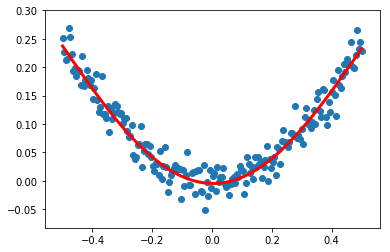

In [38]:
# 构建一个顺序模型
model = Sequential()

# 在模型中添加一个全连接层
# 网络结构: 1-10-1
model.add(Dense(units=10,input_dim=1,activation='tanh'))

# 增加激活函数 非线性
# model.add(Activation('relu'))

# 可以只设置输出不用设置输入(默认为前面的输出)
model.add(Dense(units=1,activation='tanh'))
# model.add(Activation('tanh'))

# 定义优化算法
sgd= SGD(lr=0.3)

# sgd:Stochastic gradient descent，随机梯度下降法
# mse:Mean Squared Error，均方误差
model.compile(optimizer=sgd,loss='mse')


# 训练3001个批次
for step in range(3001):
    # 每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    # 每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost:',cost)
        
# 打印权值和偏置值
W,b = model.layers[0].get_weights()
print('W:',W,'b:',b)

# x_data输入网络中，得到预测值y_pred
y_pred = model.predict(x_data)

# 显示随机点
plt.scatter(x_data,y_data)
# 显示预测结果
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()